In [113]:
#!/usr/bin/python3
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

import pandas as pd
import numpy as np
import math
import json
from os import listdir
from os.path import isfile, join
import sys
import glob
import graph_tool.all as gt
from datetime import datetime, date, time
from pyhive import hive
import ast
from queue import LifoQueue, Queue

In [111]:
df = pd.read_csv('/local0/serverless-sim/results/lazy_ser.csv')


df

FileNotFoundError: [Errno 2] No such file or directory: '/local0/serverless-sim/results/lazy_ser.csv'

ValueError: Could not interpret input 'execution_time'

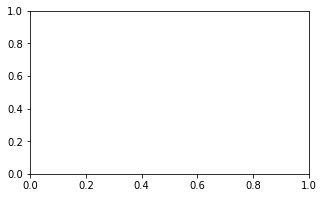

In [103]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x = 'benchmark', y = 'execution_time', hue='serialization', data = df, ax=ax)

#sns.despine()
#ax.yaxis.grid(color='#99999910', linestyle=(0, (5, 10)), linewidth=0.4)

#ax.set_xlim(left=0); 
#ax.set_ylim(bottom=0);

#ax.set_axisbelow(True)
#ax.tick_params(axis='both', which='major')
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))

#ax.set_title('Lazy serialization'); ax.set_xlabel('Data size'); ax.set_ylabel('Serialization time (sec)'); 

#plt.tight_layout()
#plt.savefig('/local0/serverless-sim/benchmark/fig_serialization.png', format='png', dpi=200)
plt.show()





In [104]:
dt = df.pivot(index='benchmark', columns='serialization', values='task_time')

fig, ax = plt.subplots(figsize=(5, 3))


dt['plazy'] = (1 - dt['lazy']/dt['syncwdeser'])*100
dt['psyncnodeser'] = (1 - dt['syncnodeser']/dt['syncwdeser'])*100

dt[['plazy', 'psyncnodeser']].plot.bar(ax=ax)


KeyError: 'serialization'

In [105]:
dt = df.pivot(index='benchmark', columns='serialization', values='execution_time')

fig, ax = plt.subplots(figsize=(5, 3))


dt['plazy'] = (1 - dt['lazy']/dt['syncwdeser'])*100
dt['psyncnodeser'] = (1 - dt['syncnodeser']/dt['syncwdeser'])*100

dt[['plazy', 'psyncnodeser']].plot.bar(ax=ax)


KeyError: 'serialization'

In [ ]:
1. for each task what fraction of the transfers was local vs remote 
2. the serialization time vs the entire task time 
3. the amount of memory that I duplicate to the memory. 

lazy = serilaization - scheduler 

try to do time multiplexing  

round robin of colors to nodes 

n workers mapped to A servers 

different consistent hashing and round robin 

try to run sklearn with dask 


In [106]:
import os

path = '/local0/serverless-sim/results/'
log_files = [os.path.join(path, f) for f in os.listdir(path)\
             if os.path.isfile(os.path.join(path, f)) and f.endswith('.log')]

dataframes = []
for f in log_files:
    benchmark, serialization, scheduling, _ = f.rsplit('/', 1)[1].split('.')
    print(benchmark, serialization, scheduling)
    with open(f, 'r') as fd:
        logs = ast.literal_eval(fd.read())
        ds = pd.DataFrame(logs['tasks'])
        
        ds['ser_tasktime'] = (ds['serialization_time'] + ds['wait_for_serialization'])/ds['task_endtoend_delay']
        ds['deser_tasktime'] = ds['deserialization_time']/ds['task_endtoend_delay']
        ds[['benchmark', 'serialization_policy', 'scheduling_policy']] = benchmark, serialization, scheduling
        
        #print((ds['serialization_time'] + ds['wait_for_serialization']).describe(), '\n\n\n')
        dataframes.append(ds)
        #sns.violinplot(x='ser_tasktime', data=ds)
    #break
df = pd.concat(dataframes)

svm_parallelization_1a899e63_8380 syncwdeser chain_color
matrixmul_10k_x_1k_afecf0c7 lazy chain_color
svd_tall_skinny_matrix_2M_x_2k_65fee51c lazy chain_color
svd_tall_skinny_matrix_400k_x_20k_0815466e lazy chain_color
matrixmul_64k_x_4k_e97482b6 syncnodeser chain_color
matrixmul_64k_x_4k_e97482b6 lazy chain_color
matrixmul_10k_x_1k_afecf0c7 syncwdeser chain_color
tree_reduction_1KB_551a0df1 lazy chain_color
tree_reduction_16KB_69bf3a06 syncnodeser chain_color
svd_tall_skinny_matrix_400k_x_20k_0815466e syncwdeser chain_color
svm_parallelization_1a899e63_8380 syncnodeser chain_color
svm_parallelization_1a899e63_8380 lazy chain_color
matrixmul_10k_x_1k_afecf0c7 syncnodeser chain_color
svd_tall_skinny_matrix_2M_x_4k_0e5e3c70 lazy chain_color
svm_parallelization_c1186f35_837e lazy chain_color
svd_tall_skinny_matrix_2M_x_4k_0e5e3c70 syncwdeser chain_color
tree_reduction_1KB_551a0df1 syncnodeser chain_color
tree_reduction_1KB_551a0df1 syncwdeser chain_color
matrixmul_64k_x_4k_e97482b6 syncwd

In [107]:
df

,name,transfer,cpu_time,remote_read,local_read,deserialization_time,serialization_time,task_endtoend_delay,write,wait_for_serialization,ser_tasktime,deser_tasktime,benchmark,serialization_policy,scheduling_policy
0,('normal-_predict-4973e05310a631f5866ba4c4c527...,0.000000,94.607617,0,0,0.000000,1.344218,95.951835,40000000,0.0,0.014009,0.000000,svm_parallelization_1a899e63_8380,syncwdeser,chain_color
1,('normal-_predict-4973e05310a631f5866ba4c4c527...,0.000000,94.817226,0,0,0.000000,1.344218,96.161444,40000000,0.0,0.013979,0.000000,svm_parallelization_1a899e63_8380,syncwdeser,chain_color
2,"('_predict-4973e05310a631f5866ba4c4c5279b4e', 6)",0.000000,0.000018,0,40000000,0.048454,1.344218,1.392690,40000000,0.0,0.965196,0.034792,svm_parallelization_1a899e63_8380,syncwdeser,chain_color
3,('normal-_predict-4973e05310a631f5866ba4c4c527...,0.000000,96.105708,0,0,0.000000,1.344218,97.449926,40000000,0.0,0.013794,0.000000,svm_parallelization_1a899e63_8380,syncwdeser,chain_color
4,"('_predict-4973e05310a631f5866ba4c4c5279b4e', 11)",0.000000,0.000011,0,40000000,0.048454,1.344218,1.392684,40000000,0.0,0.965200,0.034792,svm_parallelization_1a899e63_8380,syncwdeser,chain_color
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,('getitem-2c29ecd9e7268e598bf43893df38b8dd-r1'...,0.000000,0.000018,0,32000000,0.000000,1.057252,1.057270,32000000,0.0,0.999983,0.000000,svd_tall_skinny_matrix_2M_x_2k_65fee51c,syncnodeser,chain_color
220,('qr-r-inner-stack-svd-getitem-cf6673add365ba9...,3.337944,14.435737,224000000,96000000,0.258774,1.057252,16.292913,32000000,0.0,0.064890,0.015883,svd_tall_skinny_matrix_2M_x_2k_65fee51c,syncnodeser,chain_color
221,('getitem-cf6673add365ba9d6be6fb91de69ba70-v2'...,0.000000,0.000017,0,32000000,0.000000,1.057252,1.057269,32000000,0.0,0.999984,0.000000,svd_tall_skinny_matrix_2M_x_2k_65fee51c,syncnodeser,chain_color
222,('sum-sum-aggregate-mul-89499aaa3e81cb767aa823...,0.000000,0.025102,0,32000000,0.000000,1.057252,1.082354,32000000,0.0,0.976808,0.000000,svd_tall_skinny_matrix_2M_x_2k_65fee51c,syncnodeser,chain_color


[Text(0, 0, 'svm_parallelization_1a899e63_8380'),
 Text(1, 0, 'matrixmul_10k_x_1k_afecf0c7'),
 Text(2, 0, 'svd_tall_skinny_matrix_2M_x_2k_65fee51c'),
 Text(3, 0, 'svd_tall_skinny_matrix_400k_x_20k_0815466e'),
 Text(4, 0, 'matrixmul_64k_x_4k_e97482b6'),
 Text(5, 0, 'tree_reduction_1KB_551a0df1'),
 Text(6, 0, 'tree_reduction_16KB_69bf3a06'),
 Text(7, 0, 'svd_tall_skinny_matrix_2M_x_4k_0e5e3c70'),
 Text(8, 0, 'svm_parallelization_c1186f35_837e')]

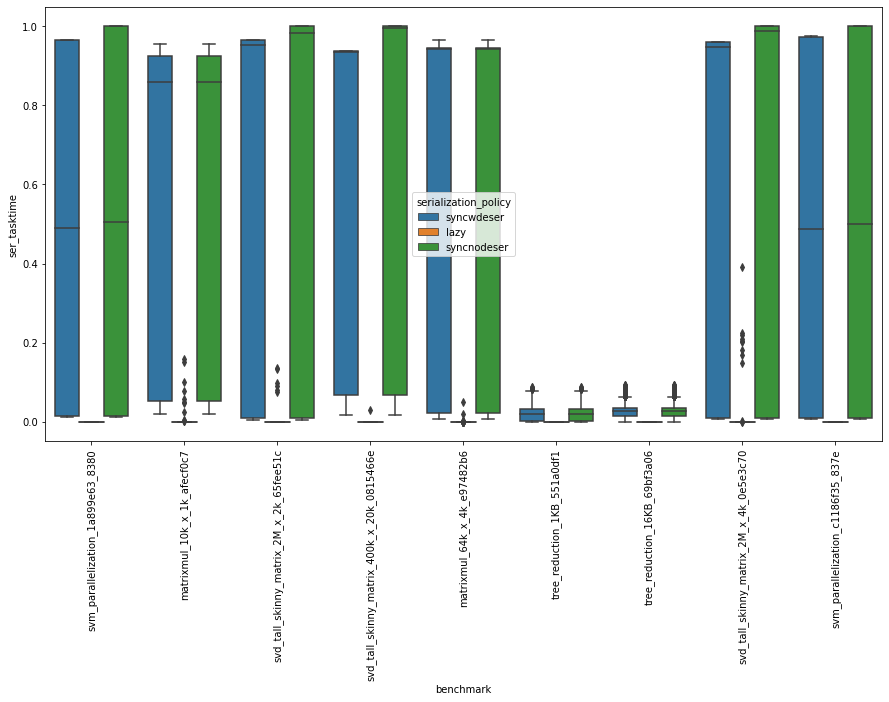

In [108]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.boxplot(x='benchmark', y='ser_tasktime', hue='serialization_policy', data=df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [109]:
df.groupby(['benchmark', 'serialization_policy']).agg('describe')['ser_tasktime']

count  \
benchmark                                  serialization_policy            
matrixmul_10k_x_1k_afecf0c7                lazy                    300.0   
                                           syncnodeser             300.0   
                                           syncwdeser              300.0   
matrixmul_64k_x_4k_e97482b6                lazy                    768.0   
                                           syncnodeser             768.0   
                                           syncwdeser              768.0   
svd_tall_skinny_matrix_2M_x_2k_65fee51c    lazy                    224.0   
                                           syncnodeser             224.0   
                                           syncwdeser              224.0   
svd_tall_skinny_matrix_2M_x_4k_0e5e3c70    lazy                    252.0   
                                           syncnodeser             252.0   
                                           syncwdeser              252.0   
svd_tall_skinny_matrix_400k_x_20k_0815466e lazy                     44.0   
                                           syncnodeser              44.0   
                                           syncwdeser               44.0   
svm_parallelization_1a899e63_8380          lazy                     40.0   
                                           syncnodeser              40.0   
                                           syncwdeser               40.0   
svm_parallelization_c1186f35_837e          lazy                     40.0   
                                           syncnodeser              40.0   
                                           syncwdeser               40.0   
tree_reduction_16KB_69bf3a06               lazy                  16383.0   
                                           syncnodeser           16383.0   
                                           syncwdeser            16383.0   
tree_reduction_1KB_551a0df1                lazy                   1023.0   
                                           syncnodeser            1023.0   
                                           syncwdeser             1023.0   

                                                                     mean  \
benchmark                                  serialization_policy             
matrixmul_10k_x_1k_afecf0c7                lazy                  0.002252   
                                           syncnodeser           0.584853   
                                           syncwdeser            0.584853   
matrixmul_64k_x_4k_e97482b6                lazy                  0.000098   
                                           syncnodeser           0.635556   
                                           syncwdeser            0.635504   
svd_tall_skinny_matrix_2M_x_2k_65fee51c    lazy                  0.002734   
                                           syncnodeser           0.512627   
                                           syncwdeser            0.495605   
svd_tall_skinny_matrix_2M_x_4k_0e5e3c70    lazy                  0.007740   
                                           syncnodeser           0.524938   
                                           syncwdeser            0.504546   
svd_tall_skinny_matrix_400k_x_20k_0815466e lazy                  0.000656   
                                           syncnodeser           0.564562   
                                           syncwdeser            0.532444   
svm_parallelization_1a899e63_8380          lazy                  0.000000   
                                           syncnodeser           0.506658   
                                           syncwdeser            0.489269   
svm_parallelization_c1186f35_837e          lazy                  0.000000   
                                           syncnodeser           0.503872   
                                           syncwdeser            0.491075   
tree_reduction_16KB_69bf3a06               lazy                  0.000000   
              